In [40]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
import sys
sys.path.append("../scripts")

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
plt.rcParams["figure.figsize"] = (14,6)

In [88]:
obs = pd.read_csv("../data/obs_arg.csv", parse_dates=["date"])
obs = obs.set_index("date")
obs = obs.drop(columns=["Total_Confirmed"])
obs

I     R    D
date                       
2020-03-03     1     0    0
2020-03-04     1     0    0
2020-03-05     1     0    0
2020-03-06     2     0    0
2020-03-07     8     0    0
...          ...   ...  ...
2020-05-08  3659  1659  293
2020-05-09  3748  1728  300
2020-05-10  3972  1757  305
2020-05-11  4127  1837  314
2020-05-12  4382  1862  319

[71 rows x 3 columns]

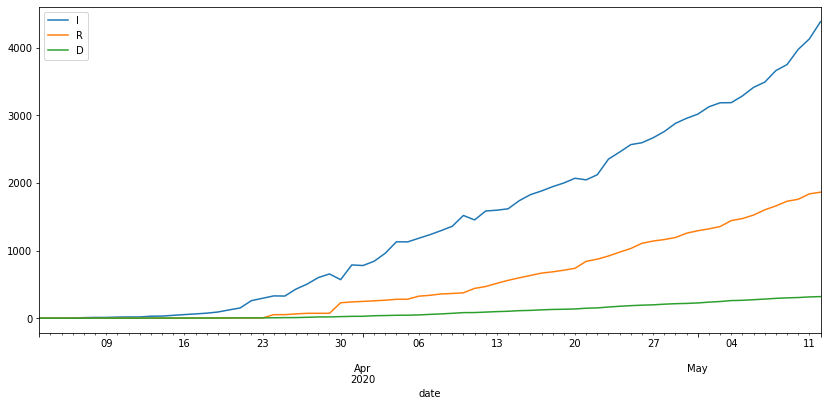

In [89]:
obs.plot()

In [90]:
obs = obs.rolling(window=7, min_periods=1).mean()

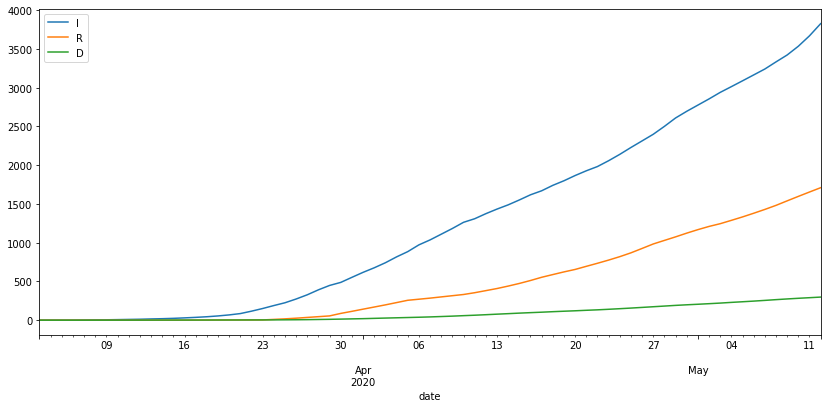

In [91]:
obs.plot()

In [242]:
train = obs["2020-04-01":"2020-04-30"].copy()
train.head()

I           R          D
date                                         
2020-04-01  617.428571  142.142857  19.571429
2020-04-02  676.142857  169.714286  23.428571
2020-04-03  741.285714  197.428571  27.142857
2020-04-04  816.857143  227.000000  30.714286
2020-04-05  884.428571  256.714286  34.285714

In [243]:
test = obs["2020-05-01":"2020-05-15"].copy()
test.head()

I            R           D
date                                            
2020-05-01  2775.714286  1168.428571  205.428571
2020-05-02  2855.571429  1209.857143  212.857143
2020-05-03  2939.857143  1245.142857  220.571429
2020-05-04  3014.000000  1288.285714  229.571429
2020-05-05  3089.142857  1332.571429  237.714286

In [244]:
from SEIR import SIR, SEIR

In [249]:
model = SEIR(population=44e6)

In [250]:
model.fit(train, estimate=('transmission_rate', "mortality_rate", "recovery_rate", "progression_rate", "initial_exposed"),
          initial_exposed=1000, weights=None, method="Nelder-Mead", options={"maxiter": 2000})

 final_simplex: (array([[8.78550274e-02, 4.06402529e-03, 2.14797388e-02, 7.54880149e-02,
        1.31394334e+03],
       [8.78550267e-02, 4.06402528e-03, 2.14797388e-02, 7.54880170e-02,
        1.31394331e+03],
       [8.78550288e-02, 4.06402528e-03, 2.14797388e-02, 7.54880100e-02,
        1.31394341e+03],
       [8.78550274e-02, 4.06402530e-03, 2.14797388e-02, 7.54880142e-02,
        1.31394335e+03],
       [8.78550271e-02, 4.06402530e-03, 2.14797388e-02, 7.54880161e-02,
        1.31394332e+03],
       [8.78550279e-02, 4.06402528e-03, 2.14797388e-02, 7.54880128e-02,
        1.31394337e+03]]), array([222.86395444, 222.86395444, 222.86395444, 222.86395444,
       222.86395444, 222.86395444]))
           fun: 222.86395444349813
       message: 'Optimization terminated successfully.'
          nfev: 648
           nit: 385
        status: 0
       success: True
             x: array([8.78550274e-02, 4.06402529e-03, 2.14797388e-02, 7.54880149e-02,
       1.31394334e+03])

In [251]:
res = model.simulate(until=60)

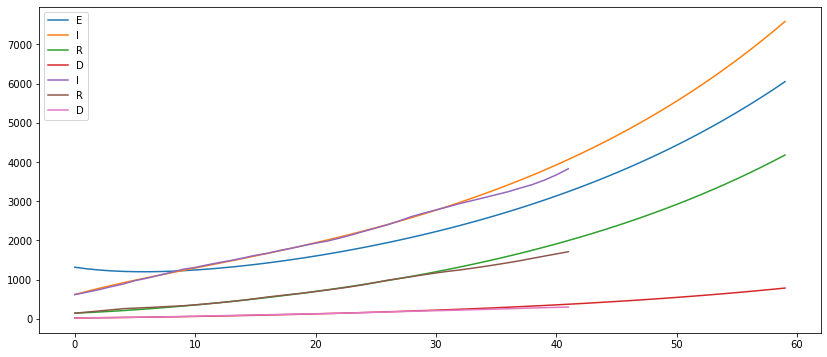

In [252]:
ax = res.plot()
pd.concat((train, test)).reset_index(drop=True).plot(ax=ax)